In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

<Figure size 864x432 with 0 Axes>

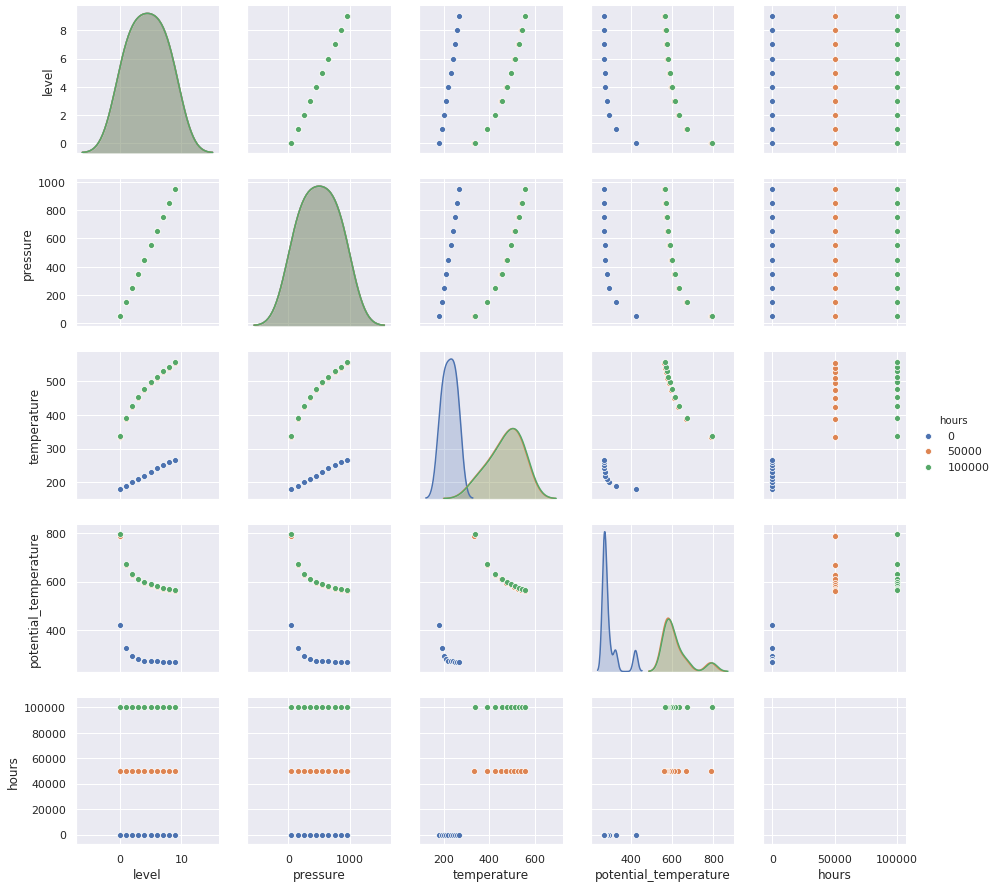

In [4]:
############ Read and Preprosessing ############
with open('output.txt', 'r') as file:
    raw = file.readlines()
get_list = ['level:','p:','T:','theta:']
info_list= [(i) for i in raw for word in get_list if i.startswith(word)]
df = pd.DataFrame(info_list, columns=['col_1'])
l = ['level:','p:','T:','theta:','\n']
df[['level','pressure','temperature','potential_temperature']] = df.col_1.str.replace('|'.join(l), '', regex=True).str.strip().str.split(expand=True)
df.drop('col_1', axis=1, inplace=True)
df = df.astype(float)
nlayer=10 # change according to main.cpp 
n_steps = 100000+1 # change according to main.cpp 
output_steps = 50000 # change according to main.cpp 
s = pd.Series(np.arange(0,n_steps,output_steps)).repeat(nlayer)
s = pd.DataFrame(s,columns=['hours'])
s.reset_index(drop=True, inplace=True)
df1 = pd.concat([df,s],axis=1)
############ Plotting ##########################
plt.figure(figsize=(12,6))
sns.pairplot(data=df1, hue="hours")
plt.show()